In [35]:
import pandas as pd
import numpy as np
tweets = pd.read_csv("results.csv")
len(tweets) #This is how many tweets I was able to capture during the length of the debate.

243821

In [41]:
def get_candidate(row):
    candidates = []
    text = row["text"].lower()
    if "clinton" in text or "hillary" in text or "Clinton" in text or "Hillary" in text:
        candidates.append("clinton")
    if "trump" in text or "donald" in text or "Trump" in text or "Donald" in text:
        candidates.append("trump")
    return ",".join(candidates)

tweets["candidate"] = tweets.apply(get_candidate,axis=1)

In [37]:
tweets.head()

,id,user_name,polarity,user_bg_color,created,user_followers,subjectivity,user_created,id_str,retweet_count,user_description,text,user_location,coordinates,candidate
0,1,NY_Places,0.000000,8E9D74,2016-09-27T00:51:45,19066,0.000000,2010-07-29T06:44:59,780570587705991169,0,"Real-time local buzz for places, events and lo...",Buzz for Garden City Hotel: https://t.co/pBNho...,New York,NaN,clinton
1,2,1KrisO1,0.000000,F5F8FA,2016-09-27T00:51:44,55,0.150000,2016-07-30T15:19:05,780570587072716800,0,"Deplorable Housewife, Mom, Kitchen Table Philo...",RT @ThePatriot143: Pray for Trump. He's walkin...,"Georgia, USA",NaN,trump
2,3,MattMurph24,0.000000,F51313,2016-09-27T00:51:45,12914,0.000000,2009-06-22T23:02:25,780570587928358913,0,"Orig from Queens, NY. Pragmatic Democrat. Yank...",Donald Trump will choke tonight in front of mi...,"Norfolk, VA",NaN,trump
3,4,OTSWST,0.066667,C0DEED,2016-09-27T00:51:45,1750,0.266667,2012-12-09T05:55:42,780570587802562560,0,a broken kid that no one needs,RT @JoeMande: FUN DEBATE DRINKING GAME: If Tru...,NaN,NaN,trump
4,5,HJudeBoudreaux,-0.500000,0F0F0F,2016-09-27T00:51:45,5698,1.000000,2009-02-03T16:17:56,780570588230275073,0,CFP and Founder of Upperline Financial Plannin...,RT @voxdotcom: These tweets will help remind y...,"New Orleans, LA",NaN,


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [42]:
counts = tweets["candidate"].value_counts() #Count the number of tweets mentioning each Candidate
countsdf = pd.DataFrame(counts) #Convert to DataFrame
countsdf = countsdf.rename(columns = {'candidate':'# of Tweets'})
countsdf

,# of Tweets
trump,149834
"clinton,trump",57517
clinton,20469
,16001


In [18]:
trumpgood=0
trumpbad=0
i = 0
while i < len(tweets):
    if tweets.loc[i].candidate == 'trump' and tweets.loc[i].polarity > 0:
        trumpgood += 1
        i += 1
    elif tweets.loc[i].candidate == 'trump' and tweets.loc[i].polarity < 0:
        trumpbad += 1
        i += 1
    else:
        i += 1

print(trumpgood,trumpbad) #47277, 33402

47277 33402


In [20]:
clingood=0
clinbad=0
i = 0
while i < len(tweets):
    if tweets.loc[i].candidate == 'clinton' and tweets.loc[i].polarity > 0:
        clingood += 1
        i += 1
    elif tweets.loc[i].candidate == 'clinton' and tweets.loc[i].polarity < 0:
        clinbad += 1
        i += 1
    else:
        i += 1

print(clingood,clinbad) #7812, 3089


7812 3089


In [28]:
trumpratio = trumpgood/trumpbad
clinratio = clingood/clinbad
print("(Trump) Ratio of Positive tweets to Negative tweets: ",trumpratio,"\n(Clinton) Ratio of Positive tweets to Negative tweets: ",clinratio)

(Trump) Ratio of Positive tweets to Negative tweets:  1.4153942877671997 
(Clinton) Ratio of Positive tweets to Negative tweets:  2.5289737779216575


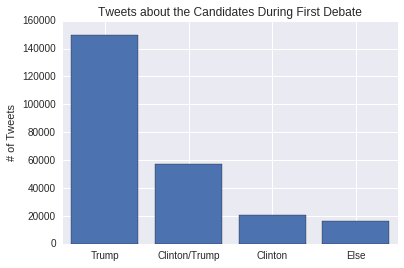

In [43]:
plt.bar(range(len(counts)),counts,align='center')
plt.xticks(range(len(counts)),['Trump','Clinton/Trump','Clinton','Else'])
plt.ylabel('# of Tweets')
plt.title('Tweets about the Candidates During First Debate')
plt.show()

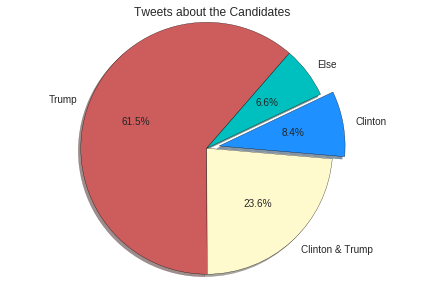

In [44]:
explode = (0,0,0.1,0)
colors = ['indianred','lemonchiffon','dodgerblue','c']
plt.pie(counts,explode=explode,labels=['Trump','Clinton & Trump','Clinton','Else'],colors=colors,autopct='%1.1f%%',shadow=True,startangle=49)
plt.axis('equal')
plt.title('Tweets about the Candidates')
plt.tight_layout()
plt.show()

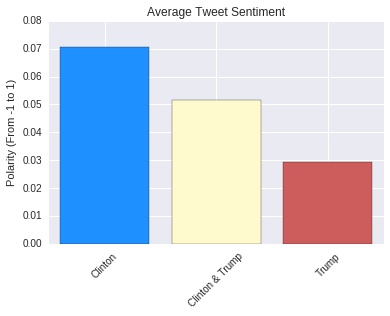

In [9]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

std = gr["polarity"]["std"].iloc[1:]
mean = gr["polarity"]["mean"].iloc[1:]


plt.bar(range(len(mean)),mean,align='center',color=['dodgerblue','lemonchiffon','indianred'])
plt.xticks(range(len(mean)),["Clinton", "Clinton & Trump", "Trump"],rotation=45)
plt.ylabel("Polarity (From -1 to 1)")
plt.title('Average Tweet Sentiment')

plt.show()

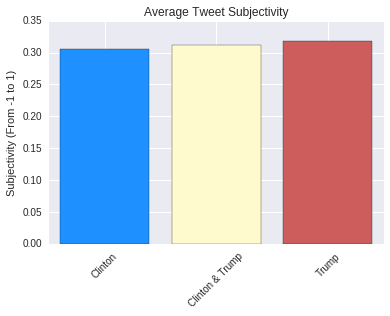

In [10]:
gr = tweets.groupby("candidate").agg([np.mean, np.std])

std = gr["subjectivity"]["std"].iloc[1:]
mean = gr["subjectivity"]["mean"].iloc[1:]


plt.bar(range(len(mean)),mean,align='center',color=['dodgerblue','lemonchiffon','indianred'])
plt.xticks(range(len(mean)),["Clinton", "Clinton & Trump", "Trump"],rotation=45)
plt.ylabel("Subjectivity (From -1 to 1)")
plt.title('Average Tweet Subjectivity')

plt.show()

In [11]:
cl_tweets_p = tweets["polarity"][tweets["candidate"] == "clinton"]
tr_tweets_p = tweets["polarity"][tweets["candidate"] == "trump"]

cl_tweets_s = tweets["subjectivity"][tweets["candidate"] == "clinton"]
tr_tweets_s = tweets["subjectivity"][tweets["candidate"] == "trump"]

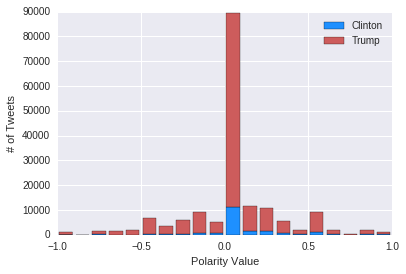

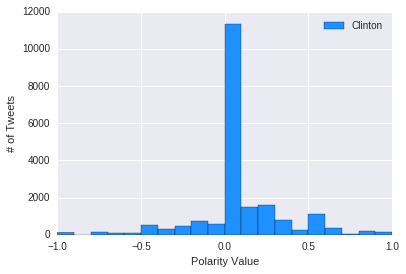

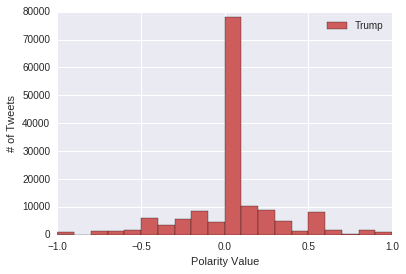

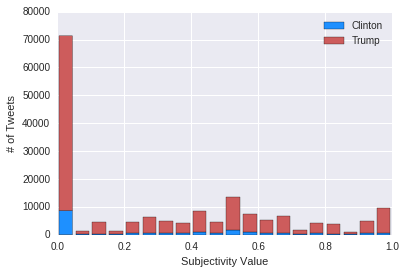

In [12]:
plt.hist([cl_tweets_p,tr_tweets_p],bins=20,stacked=True,label=["Clinton","Trump"],color=['dodgerblue','indianred'])
plt.ylabel("# of Tweets")
plt.xlabel("Polarity Value")
plt.legend()
plt.show()

plt.hist(cl_tweets_p,bins=20,stacked=True,label=["Clinton"],color=['dodgerblue'])
plt.ylabel("# of Tweets")
plt.xlabel("Polarity Value")
plt.legend()
plt.show()

plt.hist(tr_tweets_p,bins=20,stacked=True,label=["Trump"],color=['indianred'])
plt.ylabel("# of Tweets")
plt.xlabel("Polarity Value")
plt.legend()
plt.show()

plt.hist([cl_tweets_s,tr_tweets_s],bins=20,stacked=True,label=["Clinton","Trump"],color=['dodgerblue','indianred'])
plt.ylabel("# of Tweets")
plt.xlabel("Subjectivity Value")
plt.legend()
plt.show()

In [33]:
def thetest():
    if "clinton" in "this is clinton":
        print("yes!")

In [34]:
thetest()

yes!
